## **Hand-Written Digit Prediction using ANN on MNIST Handwritten Dataset**

Welcome to the "**Handwritten Digit Prediction using ANN on MNIST Handwritten Dataset**" project.

In this Python code, we'll employ an **Artificial Neural Network (ANN)** to accurately predict numerical values (ranging from 0 to 9) based on the **MNIST dataset**, which is a collection of 70,000 handwritten digits. Through this implementation, we delve into the realm of multi-class classification, showcasing the power of machine learning in recognizing and deciphering handwritten digits for various applications.

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

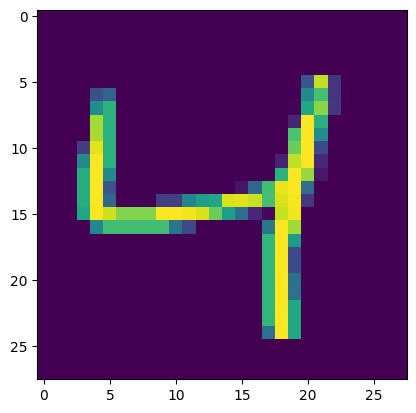

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## **Creating the NEURONS in different layers**

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2875 - accuracy: 0.9149 - val_loss: 0.1451 - val_accuracy: 0.9554
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1177 - accuracy: 0.9639 - val_loss: 0.1091 - val_accuracy: 0.9676
Epoch 3/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0820 - accuracy: 0.9746 - val_loss: 0.0930 - val_accuracy: 0.9722
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0623 - accuracy: 0.9803 - val_loss: 0.1146 - val_accuracy: 0.9683
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9848 - val_loss: 0.0972 - val_accuracy: 0.9710
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0935 - val_accuracy: 0.9752
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0964 - val_accurac

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9776

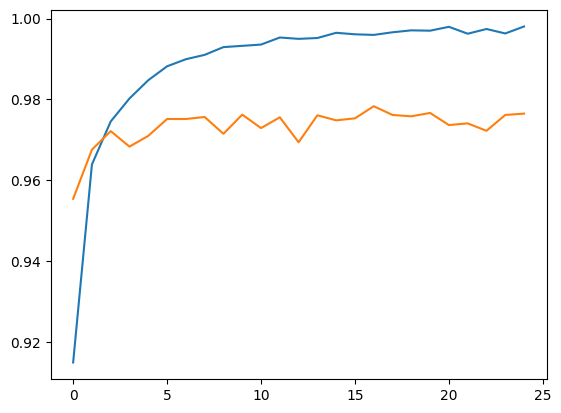

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

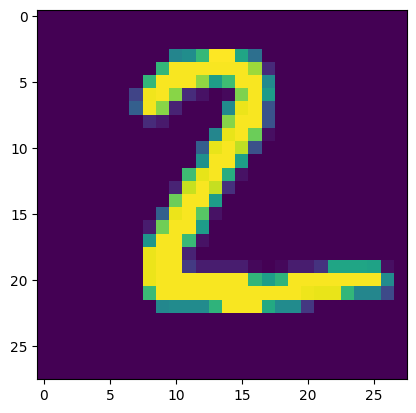

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 28ms/step


array([2])